# Implementing Harris & Shi - Tomasi Corner Detection using OpenCV

Corners in the image can be seen technically with large variation of intensity in the image.

Corners in image comes under **features in image**.
Features in images are points of interest which provide rich image content information. They are basically comprised of two things:
1. **Interest points** : Points in the image which are invariant to rotation, translation, intensity and scale changes. (Basically, robust and reliable). There are different interest points such as corners, edges, blobs etc.
2. **Feature Descriptors** : These describe the image patch around the interest points in vectors. They can be as simple as raw pixel values or complicated like Histogram of Gradients (HoG) etc.



### Harris Corner Detection

In Harris Corner Detection, we implement it in 3 steps:
1. Determine which wiindows produce very larg variations in intensity when moved in both X and Y directions.
2. With each such windows found, a score **R** is computed.
3. After applying a threshold to this score, important corners are selected and marked.

You can run this and every other notebooks locally by installing [Anaconda](https://www.anaconda.com/products/individual) or Miniconda installer and running it on your local PC.

After installation is complete, in Windows open *Anaconda Prompt*, in Linux/macOS directly open *Terminal* and enter the below codes:

`
cd '100DaysofCV/Notes & Code/Week 1/Code/Day 4'
conda activate base [if environment is not activated by default]
conda env create -f environment.yml
conda activate ml
`

After this, you will be able to run all the notebooks locally in this whole coursework.

Now, let us implement **Harris Corner Detection in OpenCV**.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from IPython.display import Image

In [2]:
img = cv.imread('checkerboard.png')

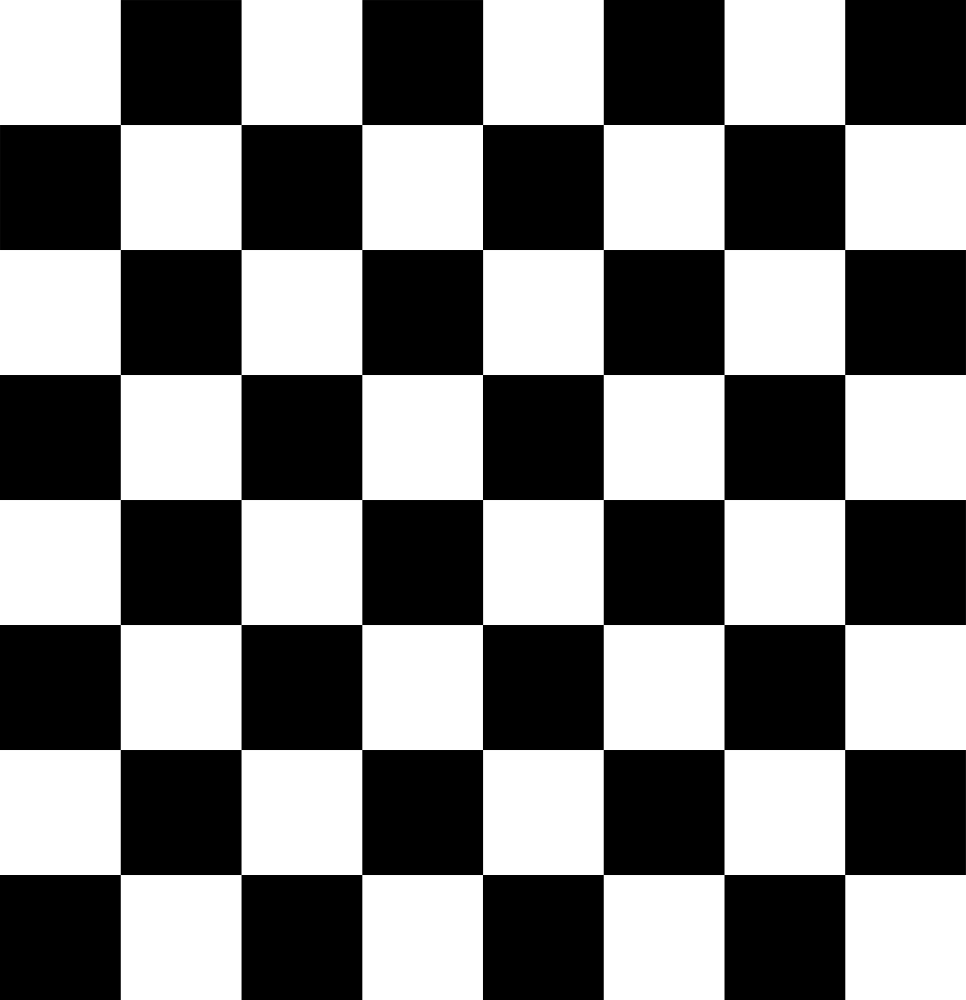

In [3]:
Image(filename='checkerboard.png', width=250, height=250)

In [4]:
# converting into grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
# converting into float32 is a prerequisite for the algorithm
gray_arr = np.float32(gray_img)

In [6]:
dst = cv.cornerHarris(gray_arr, 3, 3, 0.04)

In [7]:
# marking the corners in RED
img[dst>0.001*dst.max()] = [255,0,0]

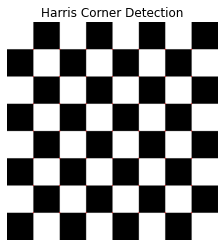

In [8]:
# Using pyplot to show the image
plt.axis("off")
plt.rcParams['figure.figsize'] = [40, 30]
plt.imshow(img)
plt.title('Harris Corner Detection')
plt.show()

### Shi - Tomasi Corner Detection

Shi-Tomasi is almost similar to Harris Corner detector, apart from the way the score (R) is calculated. This gives a better result. Moreover, in this method, we can find the top N corners, which might be useful in case we don’t want to detect each and every corner.

Let's implement it next.

In [9]:
img_shi = cv.imread('checkerboard.png')
corners_img = cv.goodFeaturesToTrack(gray_img, 1000, 0.01, 10)
blank_img = np.zeros((img.shape[0], img.shape[1], 3),np.uint8)

In [10]:
for corners in corners_img:
    x, y = corners.ravel()
    cv.circle(img_shi,(x, y), 3, [255,0,0], -1)
    cv.circle(blank_img,(x, y), 2, [255,0,0], -1)

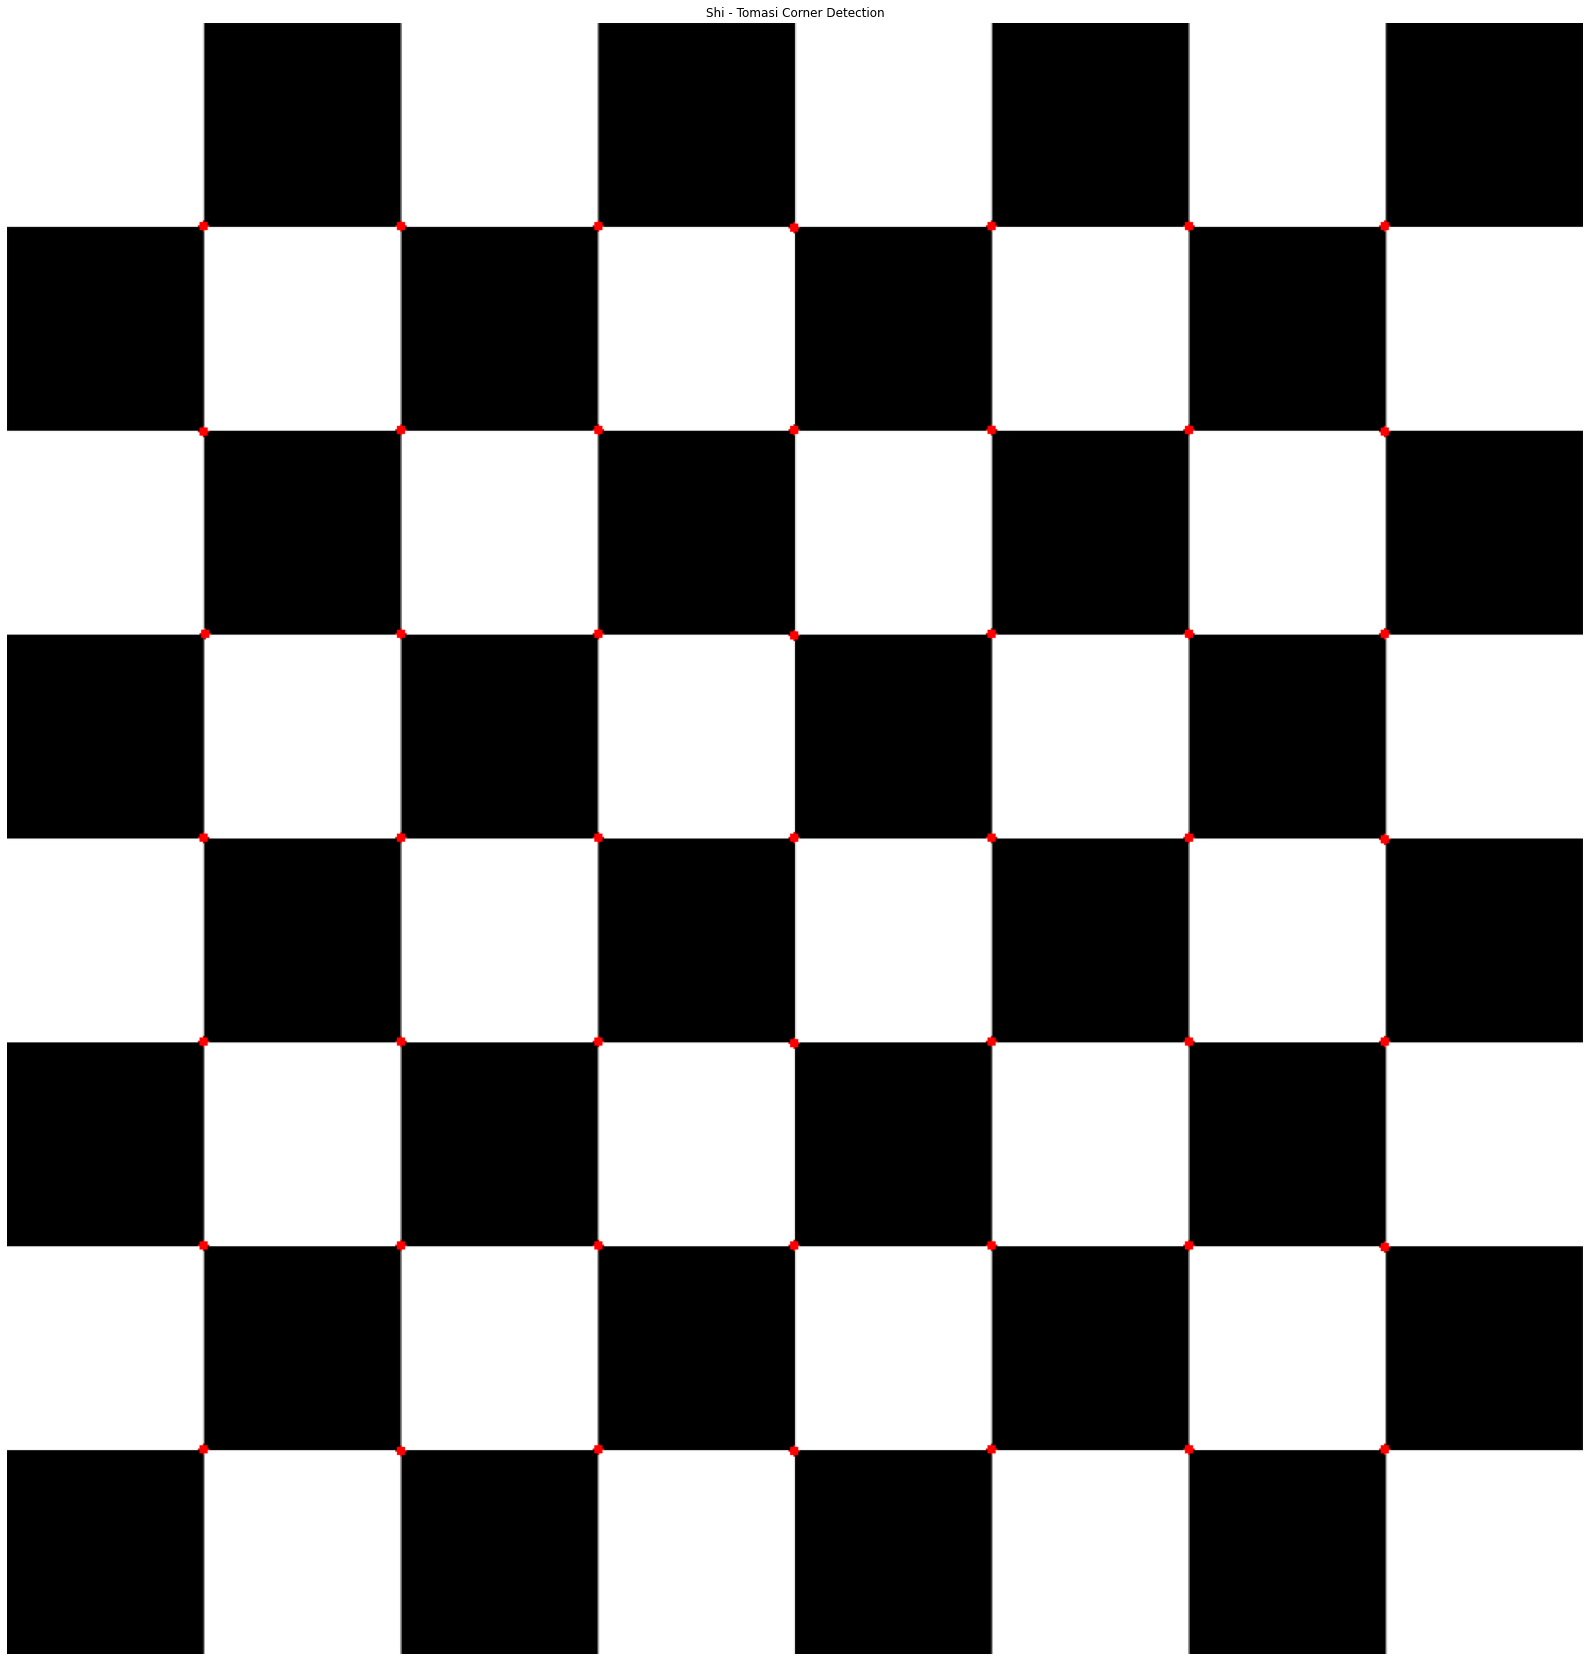

In [11]:
# Using pyplot to show the image
plt.axis("off")
plt.rcParams['figure.figsize'] = [40, 30]
plt.imshow(img_shi)
plt.title('Shi - Tomasi Corner Detection')
plt.show()